In [ ]:

import requests

# Selenium

In [1]:
!apt update
!apt install chromium-chromedriver
!pip install selenium

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Building dependency tree       
Reading state info

In [5]:
from selenium import webdriver
from bs4 import BeautifulSoup

def driversetup():
    options = webdriver.ChromeOptions()
    #run Selenium in headless mode
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    #overcome limited resource problems
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument("lang=en")
    #open Browser in maximized mode
    options.add_argument("start-maximized")
    #disable infobars
    options.add_argument("disable-infobars")
    #disable extension
    options.add_argument("--disable-extensions")
    options.add_argument("--incognito")
    options.add_argument("--disable-blink-features=AutomationControlled")
    
    driver = webdriver.Chrome(options=options)
    driver = webdriver.Chrome('chromedriver',options=options)

    #driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined});")

    return driver

In [6]:
def pagesource(url, driver):
    driver = driver
    driver.get(url)
    soup = BeautifulSoup(driver.page_source)
    driver.close()
    return soup

In [9]:
url = "https://kalispell.craigslist.org/search/sss?query=electric%20bike#search=1~gallery~0~0"
driver = driversetup()
driver.get(url)
driver.page_source

'<html><head>\n    \n\t<meta charset="UTF-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=Edge">\n\t<meta name="viewport" content="width=device-width,initial-scale=1">\n\t<meta property="og:site_name" content="craigslist">\n\t<meta name="twitter:card" content="preview">\n\t<meta property="og:title" content="kalispell for sale &quot;electric bike&quot; - craigslist">\n\t<meta name="description" content="kalispell for sale &quot;electric bike&quot; - craigslist">\n\t<meta property="og:description" content="kalispell for sale &quot;electric bike&quot; - craigslist">\n\t<meta property="og:url" content="https://kalispell.craigslist.org/search/sss?query=electric+bike">\n\t<title>kalispell for sale "electric bike"  - craigslist</title>\n\t<link rel="canonical" href="https://kalispell.craigslist.org/search/sss?query=electric+bike">\n\n\n\n\n\n    <style type="text/css">\n        body {\n            font-family: sans-serif;\n        }\n\n        #no-js {\n            position: fixed;\n   

'<html itemscope="" itemtype="http://schema.org/WebPage" lang="zh-TW">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>\n  <link crossorigin="use-credentials" href="/manifest?pwa=webhp" rel="manifest"/>\n  <title>\n   Google\n  </title>\n  <script async="" nonce="S0XweAOC7fzyst84ua34Pg" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.PlpnwD4HYro.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo-D4573md5GmdJHX15d0lc3SoObhA/cb=gapi.loaded_0">\n  </script>\n  <script nonce="S0XweAOC7fzyst84ua34Pg">\n   (function(){window.google={kEI:\'gauRY9a3Ap6Fr7wP9-qigA4\',kEXPI:\'31\',kBL:\'oABN\'};google.sn=\'webhp\';google.kHL=\'zh-TW\';})();(function(){\nvar f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return 
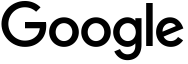

In [10]:
driver = driversetup()
#https://kalispell.craigslist.org/search/sss?query=computer#search=1~gallery~0~0
#https://kalispell.craigslist.org/search/sss?query=electric%20bike#search=1~gallery~0~0
url = "https://google.com"
pagesource(url,driver).prettify()

Spokane

In [5]:
driver = driversetup()
#https://kalispell.craigslist.org/search/sss?query=computer#search=1~gallery~0~0
#https://kalispell.craigslist.org/search/sss?query=electric%20bike#search=1~gallery~0~0
url = "https://spokane.craigslist.org/search/sss?query=electric%20bike#search=1~gallery~0~0"
pagesource(url,driver).prettify()

'<html>\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width,initial-scale=1" name="viewport"/>\n  <meta content="craigslist" property="og:site_name"/>\n  <meta content="preview" name="twitter:card"/>\n  <meta content=\'spokane for sale "electric bike" - craigslist\' property="og:title"/>\n  <meta content=\'spokane for sale "electric bike" - craigslist\' name="description"/>\n  <meta content=\'spokane for sale "electric bike" - craigslist\' property="og:description"/>\n  <meta content="https://spokane.craigslist.org/search/sss?query=electric+bike" property="og:url"/>\n  <title>\n   spokane for sale "electric bike"  - craigslist\n  </title>\n  <link href="https://spokane.craigslist.org/search/sss?query=electric+bike" rel="canonical"/>\n  <style type="text/css">\n   body {\n            font-family: sans-serif;\n        }\n\n        #no-js {\n            position: fixed;\n            z-index: 100000;\n          

Seattle

In [ ]:
driver = driversetup()
#https://kalispell.craigslist.org/search/sss?query=computer#search=1~gallery~0~0
#https://kalispell.craigslist.org/search/sss?query=electric%20bike#search=1~gallery~0~0
url = "https://spokane.craigslist.org/search/sss?query=electric%20bike#search=1~gallery~0~0"
pagesource(url,driver).prettify()

Phoneix

In [6]:
driver = driversetup()
#https://kalispell.craigslist.org/search/sss?query=computer#search=1~gallery~0~0
#https://kalispell.craigslist.org/search/sss?query=electric%20bike#search=1~gallery~0~0
url = "https://phoenix.craigslist.org/search/sss?query=klr%20650#search=1~gallery~0~0"
pagesource(url,driver).prettify()

'<html>\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width,initial-scale=1" name="viewport"/>\n  <meta content="craigslist" property="og:site_name"/>\n  <meta content="preview" name="twitter:card"/>\n  <meta content=\'phoenix for sale "klr 650" - craigslist\' property="og:title"/>\n  <meta content=\'phoenix for sale "klr 650" - craigslist\' name="description"/>\n  <meta content=\'phoenix for sale "klr 650" - craigslist\' property="og:description"/>\n  <meta content="https://phoenix.craigslist.org/search/sss?query=klr+650" property="og:url"/>\n  <title>\n   phoenix for sale "klr 650"  - craigslist\n  </title>\n  <link href="https://phoenix.craigslist.org/search/sss?query=klr+650" rel="canonical"/>\n  <style type="text/css">\n   body {\n            font-family: sans-serif;\n        }\n\n        #no-js {\n            position: fixed;\n            z-index: 100000;\n            top: 0;\n            bottom: 0;\n 

In [ ]:
URL = "https://kalispell.craigslist.org/search/sss?query=computer#search=1~gallery~0~0"
page = requests.get(URL)

print(page.text)

<!DOCTYPE html>
<html>
<head>
    
	<meta charset="UTF-8">
	<meta http-equiv="X-UA-Compatible" content="IE=Edge">
	<meta name="viewport" content="width=device-width,initial-scale=1">
	<meta property="og:site_name" content="craigslist">
	<meta name="twitter:card" content="preview">
	<meta property="og:title" content="kalispell for sale &quot;computer&quot; - craigslist">
	<meta name="description" content="kalispell for sale &quot;computer&quot; - craigslist">
	<meta property="og:description" content="kalispell for sale &quot;computer&quot; - craigslist">
	<meta property="og:url" content="https://kalispell.craigslist.org/search/sss?query=computer">
	<title>kalispell for sale &quot;computer&quot; - craigslist</title>
	<link rel="canonical" href="https://kalispell.craigslist.org/search/sss?query=computer">





    <style type="text/css">
        body {
            font-family: sans-serif;
        }

        #no-js {
            position: fixed;
            z-index: 100000;
            top

# New Section

In [ ]:
URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

print(page.text)

<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Fake Python</title>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css">
  </head>
  <body>
  <section class="section">
    <div class="container mb-5">
      <h1 class="title is-1">
        Fake Python
      </h1>
      <p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>
    </div>
    <div class="container">
    <div id="ResultsContainer" class="columns is-multiline">
    <div class="column is-half">
<div class="card">
  <div class="card-content">
    <div class="media">
      <div class="media-left">
        <figure class="image is-48x48">
          <img src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1" alt="Real Python Logo">
        </figure>
      </div>
      <div class="media-content">
        <h2 class="title is-

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(page.content, "html.parser")

In [ ]:
results = soup.find(id="ResultsContainer")

In [ ]:
print(results.prettify())

<div class="columns is-multiline" id="ResultsContainer">
 <div class="column is-half">
  <div class="card">
   <div class="card-content">
    <div class="media">
     <div class="media-left">
      <figure class="image is-48x48">
       <img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
      </figure>
     </div>
     <div class="media-content">
      <h2 class="title is-5">
       Senior Python Developer
      </h2>
      <h3 class="subtitle is-6 company">
       Payne, Roberts and Davis
      </h3>
     </div>
    </div>
    <div class="content">
     <p class="location">
      Stewartbury, AA
     </p>
     <p class="is-small has-text-grey">
      <time datetime="2021-04-08">
       2021-04-08
      </time>
     </p>
    </div>
    <footer class="card-footer">
     <a class="card-footer-item" href="https://www.realpython.com" target="_blank">
      Learn
     </a>
     <a class="card-footer-item" href=

In [ ]:
job_elements = results.find_all("div", class_="card-content")

In [ ]:
for job_element in job_elements:
    print(job_element, end="\n"*2)

<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>
<div class="content">
<p class="location">
        Stewartbury, AA
      </p>
<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>
</div>
<footer class="card-footer">
<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
</footer>
</div>

<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://fi

In [ ]:
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element)
    print(company_element)
    print(location_element)
    print()

<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
<p class="location">
        Stewartbury, AA
      </p>

<h2 class="title is-5">Energy engineer</h2>
<h3 class="subtitle is-6 company">Vasquez-Davidson</h3>
<p class="location">
        Christopherville, AA
      </p>

<h2 class="title is-5">Legal executive</h2>
<h3 class="subtitle is-6 company">Jackson, Chambers and Levy</h3>
<p class="location">
        Port Ericaburgh, AA
      </p>

<h2 class="title is-5">Fitness centre manager</h2>
<h3 class="subtitle is-6 company">Savage-Bradley</h3>
<p class="location">
        East Seanview, AP
      </p>

<h2 class="title is-5">Product manager</h2>
<h3 class="subtitle is-6 company">Ramirez Inc</h3>
<p class="location">
        North Jamieview, AP
      </p>

<h2 class="title is-5">Medical technical officer</h2>
<h3 class="subtitle is-6 company">Rogers-Yates</h3>
<p class="location">
        Davidville, AP
      </p>

<h2 class="t

In [ ]:
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text)
    print(company_element.text)
    print(location_element.text)
    print()

Senior Python Developer
Payne, Roberts and Davis

        Stewartbury, AA
      

Energy engineer
Vasquez-Davidson

        Christopherville, AA
      

Legal executive
Jackson, Chambers and Levy

        Port Ericaburgh, AA
      

Fitness centre manager
Savage-Bradley

        East Seanview, AP
      

Product manager
Ramirez Inc

        North Jamieview, AP
      

Medical technical officer
Rogers-Yates

        Davidville, AP
      

Physiological scientist
Kramer-Klein

        South Christopher, AE
      

Textile designer
Meyers-Johnson

        Port Jonathan, AE
      

Television floor manager
Hughes-Williams

        Osbornetown, AE
      

Waste management officer
Jones, Williams and Villa

        Scotttown, AP
      

Software Engineer (Python)
Garcia PLC

        Ericberg, AE
      

Interpreter
Gregory and Sons

        Ramireztown, AE
      

Architect
Clark, Garcia and Sosa

        Figueroaview, AA
      

Meteorologist
Bush PLC

        Kelseystad, AA
      

Audiolo

In [ ]:
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    print()

Senior Python Developer
Payne, Roberts and Davis
Stewartbury, AA

Energy engineer
Vasquez-Davidson
Christopherville, AA

Legal executive
Jackson, Chambers and Levy
Port Ericaburgh, AA

Fitness centre manager
Savage-Bradley
East Seanview, AP

Product manager
Ramirez Inc
North Jamieview, AP

Medical technical officer
Rogers-Yates
Davidville, AP

Physiological scientist
Kramer-Klein
South Christopher, AE

Textile designer
Meyers-Johnson
Port Jonathan, AE

Television floor manager
Hughes-Williams
Osbornetown, AE

Waste management officer
Jones, Williams and Villa
Scotttown, AP

Software Engineer (Python)
Garcia PLC
Ericberg, AE

Interpreter
Gregory and Sons
Ramireztown, AE

Architect
Clark, Garcia and Sosa
Figueroaview, AA

Meteorologist
Bush PLC
Kelseystad, AA

Audiological scientist
Salazar-Meyers
Williamsburgh, AE

English as a second language teacher
Parker, Murphy and Brooks
Mitchellburgh, AE

Surgeon
Cruz-Brown
West Jessicabury, AA

Equities trader
Macdonald-Ferguson
Maloneshire, AE
